In [51]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [8]:
from fastai.tabular import *

# Rossmann

## Data preparation

To create the feature-engineered train_clean and test_clean from the Kaggle competition data, run `rossman_data_clean.ipynb`. One important step that deals with time series is this:

```python
add_datepart(train, "Date", drop=False)
add_datepart(test, "Date", drop=False)
```

In [9]:
Config().data_path()

PosixPath('/home/paperspace/.fastai/data')

Set the variable `path` to `Config().data_path()/'rossmann'`.

Set `train_df` to the pickled dataset at `path/'train_clean'`.

In [10]:
path = Config().data_path()/'rossmann'
train_df = pd.read_pickle(path/'train_clean')

Show a transposed output of `train_df`.

In [11]:
train_df.head().T

,0,1,2,3,4
index,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,False,False,False,False,False
SchoolHoliday,1,1,1,1,1


Set the len of `train_df` to `n`, and print it out.

In [12]:
n = len(train_df); n

844338

### Experimenting with a sample

Set `idx` to a random permutation of `range(n)` up to the 2000th position.

Sort `idx`.

Set `small_train_df` to be `train_df` up to the 1000th value in `idx`.

Set `small_test_df` to be `train_df` from the 1000th value on in `idx`.

Set `small_cont_vars` to `['CompetitionDistance', 'Mean_Humidity']`

Set `small_cat_vars` to `['Store', 'DayOfWeek', 'PromoInterval']`.

Make `small_train_df` and `small_test_df` have only those variables.

In [13]:
idx = np.random.permutation(range(n))[:2000]
idx.sort()
small_train_df = train_df.iloc[idx[:1000]]
small_test_df = train_df.iloc[idx[1000:]]
small_cont_vars = ['CompetitionDistance', 'Mean_Humidity']
small_cat_vars =  ['Store', 'DayOfWeek', 'PromoInterval']
small_train_df = small_train_df[small_cat_vars + small_cont_vars + ['Sales']]
small_test_df = small_test_df[small_cat_vars + small_cont_vars + ['Sales']]

Show `small_train_df`'s first few rows.

In [14]:
small_train_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
1107,1110,5,NaN,900.0,61,6198
1525,414,4,"Jan,Apr,Jul,Oct",6210.0,56,7278
1638,527,4,NaN,5830.0,73,10469
1674,563,4,"Jan,Apr,Jul,Oct",700.0,73,4898
1737,626,4,NaN,10740.0,51,12281


Same with `small_test_df`.

In [15]:
small_test_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
434767,582,2,NaN,120.0,77,8373
434873,688,2,"Jan,Apr,Jul,Oct",18760.0,64,4463
435121,936,2,NaN,580.0,75,7254
435705,409,1,"Jan,Apr,Jul,Oct",840.0,74,6409
436099,803,1,"Mar,Jun,Sept,Dec",1760.0,74,8540


Instantiate a `Categorify` with `small_cat_vars` and `small_cont_vars` and call it `categorify`. Call `categorify` on `small_train_df`. Do it again on `small_test_df` with `test=True`.

In [16]:
categorify = Categorify(small_cat_vars, small_cont_vars)
categorify(small_train_df)
categorify(small_test_df, test=True)

Show the first few rows of `small_test_df`.

In [17]:
small_test_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
434767,582,2,NaN,120.0,77,8373
434873,688,2,"Jan,Apr,Jul,Oct",18760.0,64,4463
435121,936,2,NaN,580.0,75,7254
435705,409,1,"Jan,Apr,Jul,Oct",840.0,74,6409
436099,803,1,"Mar,Jun,Sept,Dec",1760.0,74,8540


Show the categories from `small_train_df.PromoInterval`.

In [18]:
small_train_df.PromoInterval.cat.categories

Index(['Feb,May,Aug,Nov', 'Jan,Apr,Jul,Oct', 'Mar,Jun,Sept,Dec'], dtype='object')

Show the `small_train_df` column.

In [24]:
small_train_df['PromoInterval']

1107                   NaN
1525       Jan,Apr,Jul,Oct
1638                   NaN
1674       Jan,Apr,Jul,Oct
1737                   NaN
2351       Feb,May,Aug,Nov
3881       Jan,Apr,Jul,Oct
4377       Jan,Apr,Jul,Oct
4431       Jan,Apr,Jul,Oct
4641       Jan,Apr,Jul,Oct
5298       Jan,Apr,Jul,Oct
7609       Jan,Apr,Jul,Oct
8117       Feb,May,Aug,Nov
8319       Jan,Apr,Jul,Oct
8332                   NaN
8399                   NaN
8670                   NaN
8843       Jan,Apr,Jul,Oct
8875                   NaN
9063       Jan,Apr,Jul,Oct
9155                   NaN
9163       Feb,May,Aug,Nov
9641                   NaN
10192                  NaN
10216                  NaN
10779                  NaN
10990                  NaN
11243      Jan,Apr,Jul,Oct
11456      Feb,May,Aug,Nov
12459      Feb,May,Aug,Nov
                ...       
423360     Jan,Apr,Jul,Oct
423613                 NaN
424320     Jan,Apr,Jul,Oct
425045                 NaN
425555    Mar,Jun,Sept,Dec
426348    Mar,Jun,Sept,Dec
4

Show the first 5 categorical codes from `small_train_df['PromoInterval']`.

In [19]:
small_train_df['PromoInterval'].cat.codes[:5]

1107   -1
1525    1
1638   -1
1674    1
1737   -1
dtype: int8

Instantiate a `FillMissing` object in the same way, and call it `fill_missing`. Call it like a function applied to `small_train_df` and `small_test_df`.

In [20]:
fill_missing = FillMissing(small_cat_vars, small_cont_vars)
fill_missing(small_train_df)
fill_missing(small_test_df, test=True)

A new column, `CompetitionDistance_na` exists on the train dataframe. Show the rows where it's `True`.

In [26]:
small_train_df[small_train_df['CompetitionDistance_na'] == True]

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales,CompetitionDistance_na
87010,291,2,NaN,2280.0,94,10119,True
251027,291,2,NaN,2280.0,71,9186,True


### Preparing full data set

Read the full `train_clean` to `train_df`.

Read the full `test_clean` to `test_df`.

In [27]:
train_df = pd.read_pickle(path/'train_clean')
test_df = pd.read_pickle(path/'test_clean')

Print out `len(train_df)` and `len(test_df)`.

In [28]:
len(train_df),len(test_df)

(844338, 41088)

Set our `procs` to `FillMissing`, `Categorify`, and `Normalize`.

In [29]:
procs=[FillMissing, Categorify, Normalize]

This:
```
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw']

cont_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']
```

Set `dep_var` to `Sales`.

Constrain the columns in `df` to `cat_vars`, `cont_vars`, `dep_var`, and `Date`.

In [31]:
dep_var = 'Sales'
df = train_df[cat_vars + cont_vars + [dep_var,'Date']].copy()

Show the `min` and `max` `Date`.

In [32]:
test_df['Date'].min(), test_df['Date'].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

Show the length of `test_df`.

In [33]:
len(test_df)

41088

Create a variable `cut` that represents the cutoff point before which all rows will be part of the validation set. The logic here is that we want it to be about as big as the test set, but that it should be comprised of all complete days that don't exist in the training set. You'll want to get the maximum index of the rows sharing the date found at the `len(test_df)`th row of the training set. In other words: find the date at `len(test_df)` and find the _last_ index in the training set that shares that date.

In [39]:
cut = train_df['Date'][(train_df['Date'] == train_df['Date'][len(test_df)])].index.max()
cut

41395

Set `valid_idx` to the range of values up to `cut`.

In [40]:
valid_idx = range(cut)

Show the first few rows of `df[dep_var]`.

In [42]:
df[dep_var].head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

Create a data bunch from the `df` that we've created. Hints:
- This will start with a `TabularList`
- You can use `split_by_idx` to specify the validation indices
- You can label from the df using `label_from_df`. Remember to specify `label_cls=FloatList` to mark this as a regression problem, and to specify that `log=True`.
- Use `add_test` to add aa test set
- Call `databunch()` to turn the `TabularList` into a `DataBunch`.

In [43]:
data = (TabularList.from_df(df, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs,)
                .split_by_idx(valid_idx)
                .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                .add_test(TabularList.from_df(test_df, path=path, cat_names=cat_vars, cont_names=cont_vars))
                .databunch())

In [44]:
doc(FloatList)

## Model

Set `max_log_y` to the log of the `Sales` column + 20%. Set `y_range` to a 2-element torch tensor with the first element being `0` and the second element being `max_log_y`. Set `device` to `defaults.device`. What does this last part do?

In [45]:
max_log_y = np.log(np.max(train_df['Sales'])*1.2)
y_range = torch.tensor([0, max_log_y], device=defaults.device)

Create a learner using the databunch you created earlier, with layers `1000,500`, `ps=[0.001, 0.01]`, `emb_drop = 0.04`, with the `y_range` you created above. Your metrics should be `exp_rmspe`.

In [46]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                        y_range=y_range, metrics=exp_rmspe)

Show the model object.

In [47]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(1116, 81)
    (1): Embedding(8, 5)
    (2): Embedding(4, 3)
    (3): Embedding(13, 7)
    (4): Embedding(32, 11)
    (5): Embedding(3, 3)
    (6): Embedding(26, 10)
    (7): Embedding(27, 10)
    (8): Embedding(5, 4)
    (9): Embedding(4, 3)
    (10): Embedding(4, 3)
    (11): Embedding(24, 9)
    (12): Embedding(9, 5)
    (13): Embedding(13, 7)
    (14): Embedding(53, 15)
    (15): Embedding(22, 9)
    (16): Embedding(7, 5)
    (17): Embedding(7, 5)
    (18): Embedding(4, 3)
    (19): Embedding(4, 3)
    (20): Embedding(9, 5)
    (21): Embedding(9, 5)
    (22): Embedding(3, 3)
    (23): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=233, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

Show the len of `cont_names` in the `train_ds`.

In [48]:
len(data.train_ds.cont_names)

16

Use the learning rate finder.

In [53]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Show the learning rate plot. The ideal starting spot should be around `1e-2 - 1e-3`.

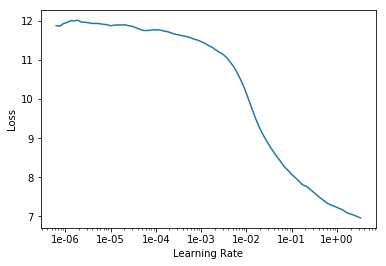

In [54]:
learn.recorder.plot()

Fit one cycle with 5 epochs at the learning rate you found, with rate decay 0.2.

In [55]:
learn.fit_one_cycle(5, 1e-3, wd=0.2)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.022044,0.022496,0.138610,03:29
1,0.018692,0.027197,0.157199,03:30
2,0.017521,0.023849,0.143805,03:36
3,0.011676,0.013806,0.110651,03:29
4,0.010638,0.011454,0.105012,03:37


Save the learner to `l`.

In [56]:
learn.save('1')

Show the losses, skipping the first 7000 batches processed.

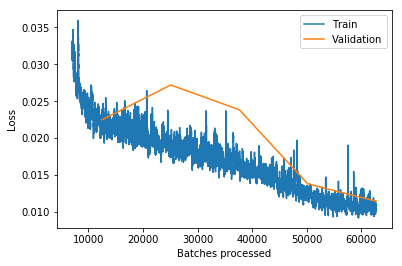

In [64]:
learn.recorder.plot_losses(skip_start=7000)

Load `l`.

In [65]:
learn.load('1');

Fit another cycle with 5 epochs and learning rate 3e-4.

In [66]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,exp_rmspe,time


KeyboardInterrupt: 

Fit another cycle with 5 epochs and lr = 3e-4.

In [ ]:
learn.fit_one_cycle(5, 3e-4)

10th place in the competition was 0.108. How low can you get? 

Get the predictions from the test set and set them to `test_preds`. Set `test_df['Sales']` to the exponentiated values of `test_preds[0].data`, converted to a numpy array, and then call `T[0]`. Why did you have to do `test_preds[0].data`? Why `.T[0]`? Replace `test_df[["Id", "Sales"]]` with an int-ified version of itself. Write it out to a `csv` `rossmann_submission.csv` without an index.

In [67]:
test_preds=learn.get_preds(DatasetType.Test)
test_df["Sales"]=np.exp(test_preds[0].data).numpy().T[0]
test_df[["Id","Sales"]]=test_df[["Id","Sales"]].astype("int")
test_df[["Id","Sales"]].to_csv("rossmann_submission.csv",index=False)